In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

NUM_SEEDS = 10

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [111]:
matrixName2n = {
    "ash292": 292,
    "ash85": 85,
    "bcspwr01": 39,
    "bcspwr02": 49,
    "bcspwr03": 118,
    "bcspwr04": 274,
    "bcspwr05": 443,
    "can_144": 144,
    "can_161": 161,
    "can_187": 187,
    "can_229": 229,
    "can_24": 24,
    "can_256": 256,
    "can_268": 268,
    "can_292": 292,
    "can_445": 445,
    "can_61": 61,
    "can_62": 62,
    "can_634": 634,
    "can_715": 715,
    "can_73": 73,
    "can_838": 838,
    "can_96": 96,
    "dwt_162": 162,
    "dwt_193": 193,
    "dwt_209": 209,
    "dwt_221": 221,
    "dwt_245": 245,
    "dwt_307": 307,
    "dwt_310": 310,
    "dwt_361": 361,
    "dwt_419": 419,
    "dwt_503": 503,
    "dwt_59": 59,
    "dwt_592": 592,
    "dwt_66": 66,
    "dwt_72": 72,
    "dwt_758": 758,
    "dwt_869": 869,
    "dwt_87": 87,
    "dwt_878": 878,
    "dwt_918": 918,
    "dwt_992": 992,
    "jagmesh1": 936,
    "lshp_265": 265,
    "lshp_406": 406,
    "lshp_577": 577,
    "lshp_778": 778,
    "G1": 800,
    "G14": 800,
    "G15": 800,
    "G16": 800,
    "G17": 800,
    "G2": 800,
    "G3": 800,
    "G4": 800,
    "G43": 1000,
    "G44": 1000,
    "G45": 1000,
    "G46": 1000,
    "G47": 1000,
    "G5": 800,
    "G51": 1000,
    "G52": 1000,
    "G53": 1000,
    "G54": 1000,
    "mesh3e1": 289,
    "mesh3em5": 289,
    "sphere2": 66,
    "sphere3": 258,
    "lap_25": 25,
    "GD06_theory": 101,
    "GD96_c": 65,
    "GD97_a": 84,
    "GD98_c": 112,
    "GD99_b": 64,
    "Journals": 124,
    "Sandi_authors": 86,
    "USAir97": 332,
    "EX1": 560,
    "EX2": 560,
    "Trefethen_20b": 19,
    "Trefethen_20": 20,
    "Trefethen_150": 150,
    "Trefethen_200b": 199,
    "Trefethen_200": 200,
    "Trefethen_300": 300,
    "Trefethen_500": 500,
    "Trefethen_700": 700,
    "adjnoun": 112,
    "dolphins": 62,
    "football": 115,
    "karate": 34,
    "lesmis": 77,
    "polbooks": 105,
    "jazz": 198,
    "celegans_metabolic": 453,
    "grid1": 252,
    "grid1_dual": 224,
    "netz4504_dual": 615,
    "L": 956,
    "cage": 366,
    "chesapeake": 39,
    "mycielskian2": 2,
    "mycielskian3": 5,
    "mycielskian4": 11,
    "mycielskian5": 23,
    "mycielskian6": 47,
    "mycielskian7": 95,
    "mycielskian8": 191,
    "mycielskian9": 383,
    "mycielskian10": 767,
    "breasttissue_10NN": 106,
    "collins_15NN": 1000,
    "dermatology_5NN": 366,
    "Ecoli_10NN": 336,
    "Glass_10NN": 214,
    "iris_dataset_30NN": 150,
    "micromass_10NN": 571,
    "Olivetti_norm_10NN": 400,
    "Spectro_10NN": 531,
    "umistfacesnorm_10NN": 575,
    "Vehicle_10NN": 846,
    "YaleA_10NN": 165,
}

In [113]:
def parse_hist_file(file_path):

    data = {}
    with open(file_path, "r") as file:
        num_matrices, num_methods = map(int, file.readline().strip().split())

        for _ in range(num_matrices):
            matrix_name = file.readline().strip()
            data[matrix_name] = {}

            for _ in range(num_methods):
                method_name = file.readline().strip()
                method_name = method_name.replace("_", "-")
                data[matrix_name][method_name] = {}
                for idx in range(NUM_SEEDS):
                    data[matrix_name][method_name][idx] = {}
                    score_line = file.readline().strip()
                    score = float(score_line.split(": ")[1])
                    data[matrix_name][method_name][idx]["score"] = score

    return data

{'mycielskian2': {'FR': {0: {'score': 0.339954}, 1: {'score': 0.339954}, 2: {'score': 0.339954}, 3: {'score': 0.424186}, 4: {'score': 0.339954}, 5: {'score': 0.339954}, 6: {'score': 0.56359}, 7: {'score': 0.339961}, 8: {'score': 0.339954}, 9: {'score': 0.339954}}, 'SN-FR': {0: {'score': 0.339954}, 1: {'score': 0.339954}, 2: {'score': 0.339954}, 3: {'score': 0.339954}, 4: {'score': 0.339954}, 5: {'score': 0.339954}, 6: {'score': 0.339954}, 7: {'score': 0.339954}, 8: {'score': 0.339954}, 9: {'score': 0.339954}}, 'L-BFGS': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9: {'score': 0.339953}}, 'SN-L-BFGS': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9:

/tmp/ipykernel_4518/3857123089.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


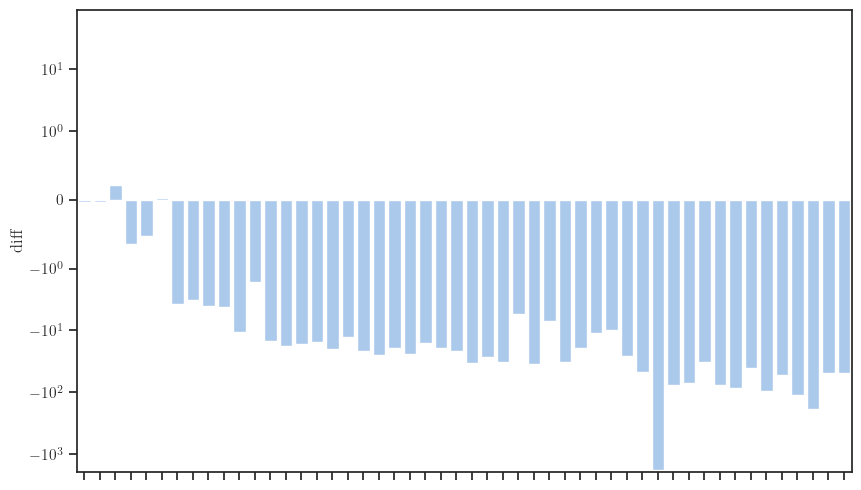

,Method_nonSN,matrixName,score_nonSN,n_nonSN,Method_SN,score_SN,n_SN,diff
2,FR,mycielskian4,5.838658,11,SN-FR,6.048010,11,0.209352
5,FR,mycielskian5,16.489635,23,SN-FR,16.520169,23,0.030533


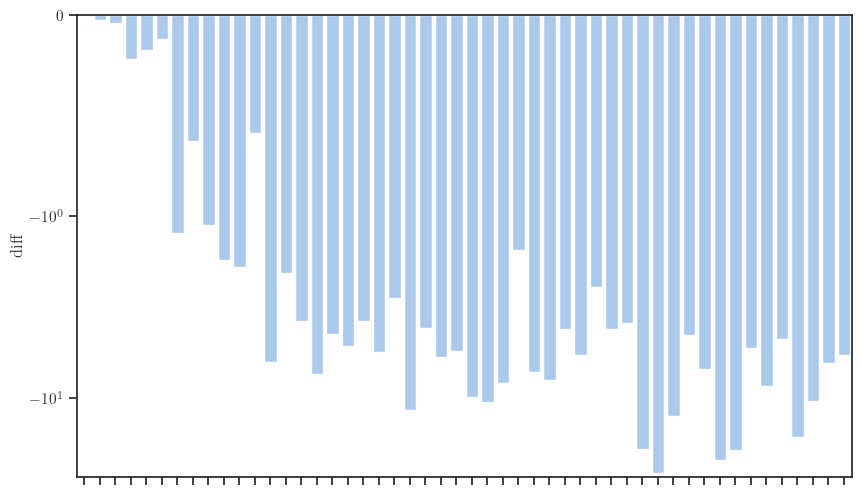

,Method_nonSN,matrixName,score_nonSN,n_nonSN,Method_SN,score_SN,n_SN,diff


{'mycielskian2': {'FR': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9: {'score': 0.339953}}, 'SN-FR': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9: {'score': 0.339953}}, 'L-BFGS': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9: {'score': 0.339953}}, 'SN-L-BFGS': {0: {'score': 0.339953}, 1: {'score': 0.339953}, 2: {'score': 0.339953}, 3: {'score': 0.339953}, 4: {'score': 0.339953}, 5: {'score': 0.339953}, 6: {'score': 0.339953}, 7: {'score': 0.339953}, 8: {'score': 0.339953}, 9

/tmp/ipykernel_4518/3857123089.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


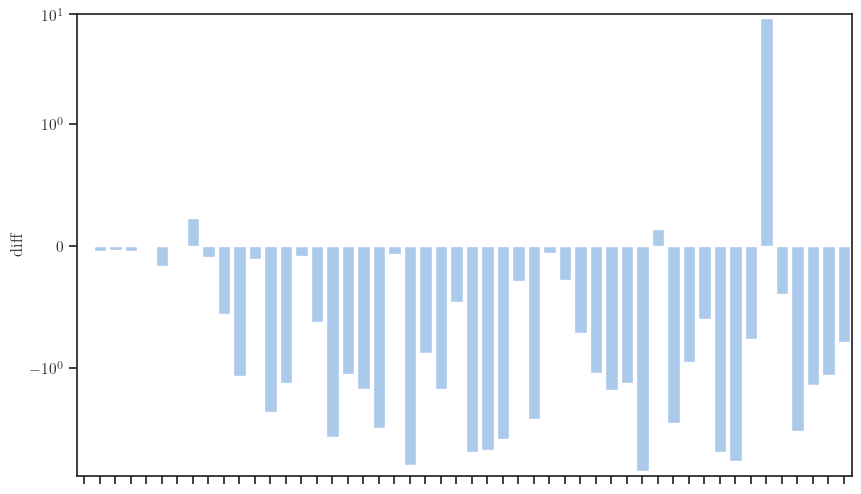

,Method_nonSN,matrixName,score_nonSN,n_nonSN,Method_SN,score_SN,n_SN,diff
7,FR,lap_25,9.567812,25,SN-FR,9.796106,25,0.228293
37,FR,Journals,225.753817,124,SN-FR,225.894160,124,0.140344
44,FR,can_187,30.473368,187,SN-FR,39.727409,187,9.254040


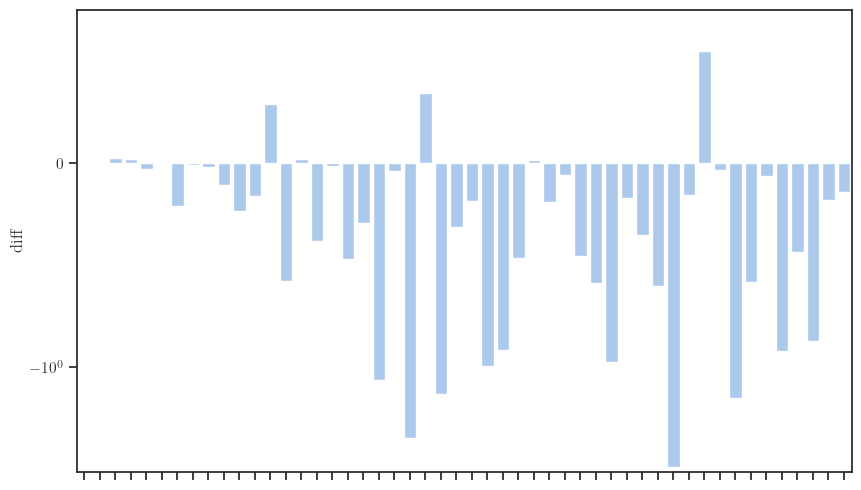

,Method_nonSN,matrixName,score_nonSN,n_nonSN,Method_SN,score_SN,n_SN,diff
2,L-BFGS,mycielskian4,5.519338,11,SN-L-BFGS,5.544722,11,0.025385
3,L-BFGS,Trefethen_20b,11.992289,19,SN-L-BFGS,12.014472,19,0.022183
12,L-BFGS,bcspwr02,1.082239,49,SN-L-BFGS,1.372683,49,0.290445
14,L-BFGS,can_61,22.128221,61,SN-L-BFGS,22.149599,61,0.021377
22,L-BFGS,can_73,25.410909,73,SN-L-BFGS,25.752855,73,0.341946
29,L-BFGS,can_96,30.421385,96,SN-L-BFGS,30.439742,96,0.018357
40,L-BFGS,iris_dataset_30NN,9.704435,150,SN-L-BFGS,10.254922,150,0.550487


In [117]:
for file_path in ["hist_15.txt", "hist_50.txt"]:
    parsed_data = parse_hist_file(file_path)
    print(parsed_data)

    df = pd.DataFrame(columns=["Method", "matrixName", "score"])
    for matrix_name, matrix_data in parsed_data.items():
        for method_name, method_data in matrix_data.items():
            for seed_idx, seed_data in method_data.items():
                df = pd.concat(
                    [
                        df,
                        pd.DataFrame(
                            {
                                "Method": [method_name],
                                "matrixName": [matrix_name],
                                "score": [seed_data["score"]],
                            }
                        ),
                    ]
                )

    df_mean = df.groupby(["Method", "matrixName"]).mean().reset_index()

    # sort rows by the n of the matrix
    df_mean["n"] = df_mean["matrixName"].map(matrixName2n)
    df_mean = df_mean.sort_values("n")

    for methodSuffix in ["FR", "L-BFGS"]:
        df_nonSN = df_mean[df_mean["Method"] == methodSuffix]
        df_SN = df_mean[df_mean["Method"] == "SN-" + methodSuffix]
        df_merged = pd.merge(
            df_nonSN, df_SN, on="matrixName", suffixes=(f"_nonSN", f"_SN")
        )
        df_merged["diff"] = df_merged["score_SN"] - df_merged["score_nonSN"]

        plt.figure(figsize=(10, 6))
        sns.barplot(x="matrixName", y="diff", data=df_merged)
        plt.yscale("symlog", linthresh=1)
        plt.xlabel("")
        plt.xticks(visible=False)
        plt.show()

        # df_merged["diff"] の中から、正の値を持つ行だけを抽出
        df_merged_positive = df_merged[df_merged["diff"] > 0]
        display(df_merged_positive)